# Variational Monte Carlo: Harmonic Oscillator

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Hamiltonian

\begin{equation}
\hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + \frac{1}{2} x^2
\end{equation}

where $\hbar = \omega = m = 1$.

## Local Energy and Transition Probability

\begin{equation}
E_L^\alpha (x) = \alpha + x^2\left(\frac{1}{2} - 2\alpha^2\right)
\end{equation}

\begin{equation}
\frac{\pi(x^\prime)}{\pi(x)} = \mathrm{e}^{-2\alpha({x^\prime}^2 - x^2)}
\end{equation}

In [9]:
def EL(x,a):
    if x < a and x > -a:
        return x**7/7 - a**2*x**5/5 + a**4 * x**3/3 + a**2 * x - x**3/3
    
def transition_probability(x,xt,a):
    if x < a and xt < a and x > -a and xt > -a:
        return ((a**2 - x**2)*(a**2 - xt**2))**2
    else:
        return 0

In [10]:
def vmc(num_walkers,num_MC_steps,num_equil_steps,a,d=1.0):
    
    # initilaize walkers
    walkers = -0.5 + np.random.rand(num_walkers)
    
    # initialize energy and number of accepted updates
    estimator = {'E':np.zeros(num_MC_steps-num_equil_steps)}
    num_accepted = 0
    
    for step in range(num_MC_steps):
        
        # generate new walker positions 
        new_walkers = np.random.normal(loc=walkers, scale=d, size=num_walkers)
        
        # test new walkers
        for i in range(num_walkers):
            if np.random.random() < transition_probability(walkers[i],new_walkers[i],a):
                num_accepted += 1
                walkers[i] = new_walkers[i]
                
            # measure energy
            if step >= num_equil_steps:
                measure = step-num_equil_steps
                estimator['E'][measure] = EL(walkers[i],a)
                
    # output the acceptance ratio
    print('accept: %4.2f' % (num_accepted/(num_MC_steps*num_walkers)))
    
    return estimator

## Perform the VMC Simulation

In [11]:
a = 0.45
num_walkers = 100
num_MC_steps = 20000
num_equil_steps = 5000

np.random.seed(1173)

estimator = vmc(num_walkers,num_MC_steps,num_equil_steps,a)

accept: 0.00


## Compute the average energy and standard error

In [12]:
from scipy.stats import sem
Ē,ΔĒ = np.average(estimator['E']),sem(estimator['E'])

print('Ē = %f ± %f' % (Ē,ΔĒ))

Ē = -0.037523 ± 0.000096


## Due a brute-force minimizaiton search over the variational parameter $\alpha$

In [13]:
Ēmin = []
ΔĒmin = []
a = np.array([0.45, 0.475, 0.5, 0.525, 0.55])
for ca in a: 
    estimator = vmc(num_walkers,num_MC_steps,num_equil_steps,ca)
    Ē,ΔĒ = np.average(estimator['E']),sem(estimator['E'])
    Ēmin.append(Ē)
    ΔĒmin.append(ΔĒ)
    print('%5.3f \t %7.5f ± %f' % (ca,Ē,ΔĒ))

accept: 0.00
0.450 	 -0.01034 ± 0.000192
accept: 0.00
0.475 	 -0.00995 ± 0.000387
accept: 0.00
0.500 	 -0.00328 ± 0.000429
accept: 0.00
0.525 	 -0.00938 ± 0.000293
accept: 0.00
0.550 	 0.01377 ± 0.000456


## Compare VMC with the exact variational energy

\begin{equation}
E_v = \frac{\alpha}{2} + \frac{1}{8\alpha}
\end{equation}

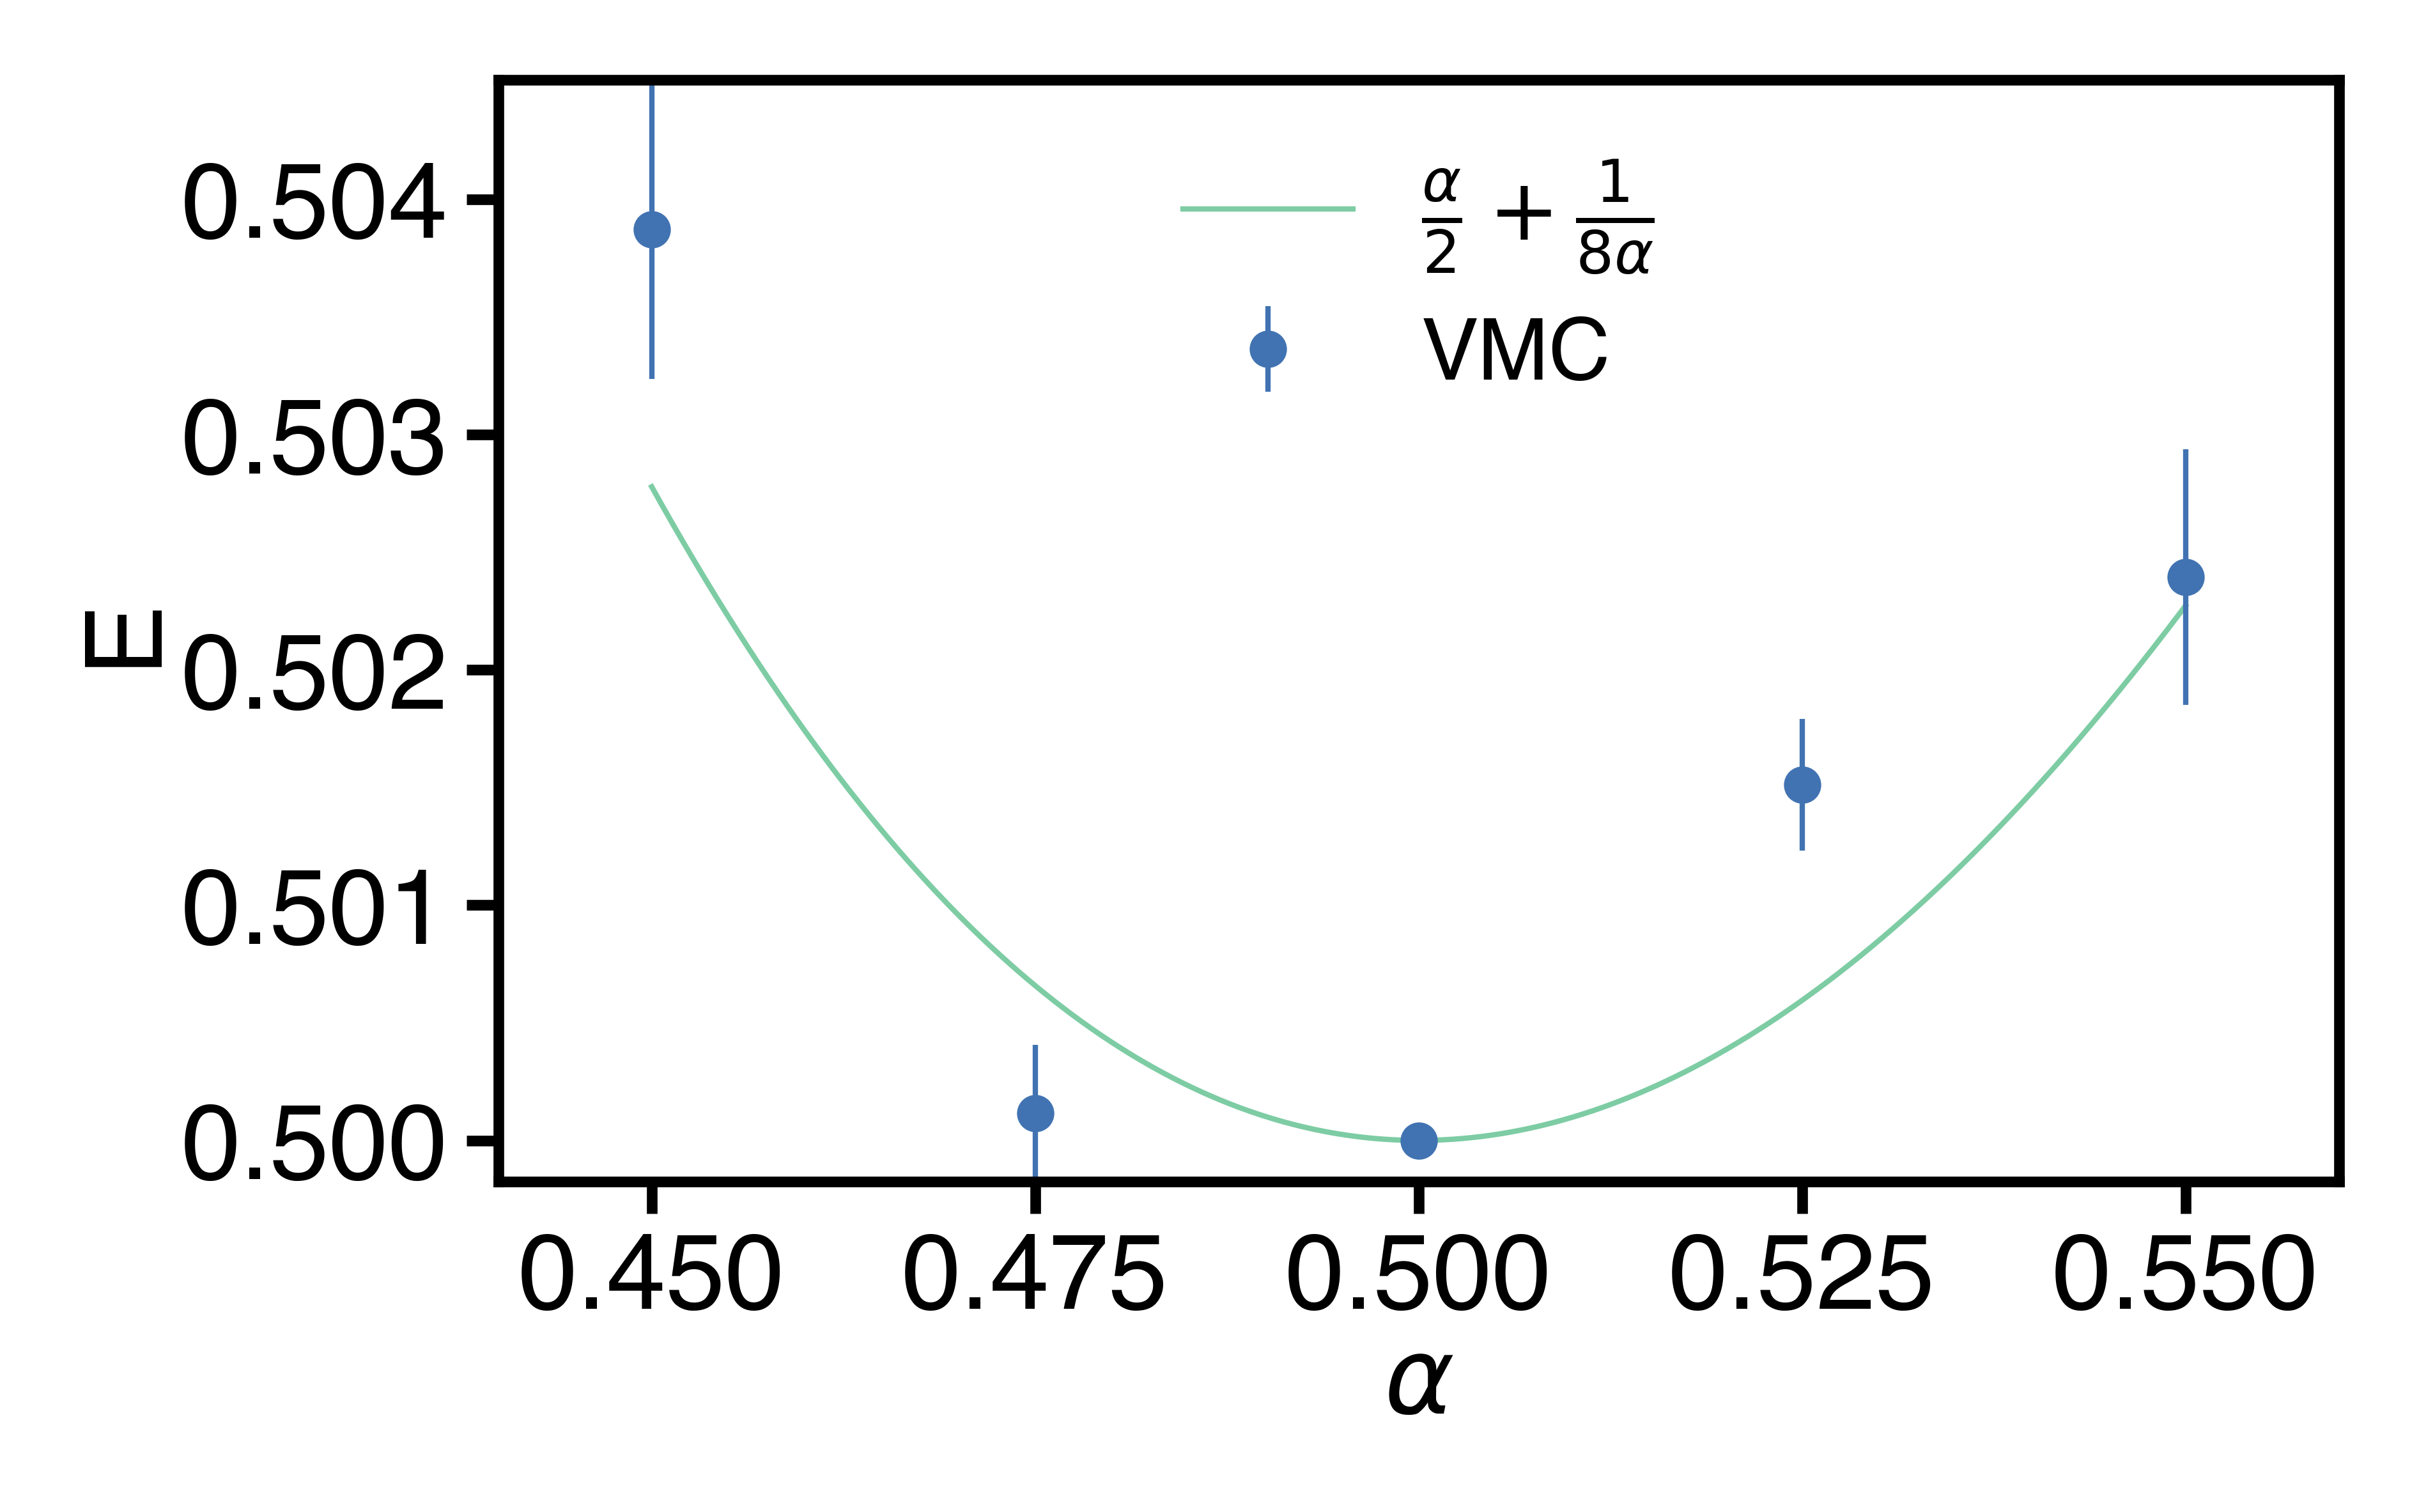

In [7]:
ca = np.linspace(a[0],a[-1],1000)
plt.plot(ca,0.5*cα + 1/(8*cα), '-', linewidth=1, color=green, zorder=-10, 
         label=r'$\frac{\alpha}{2} + \frac{1}{8\alpha}$')
plt.errorbar(α,Ēmin,yerr=ΔĒmin, linestyle='None', marker='o', elinewidth=1.0, 
             markersize=6, markerfacecolor=blue, markeredgecolor=blue, ecolor=blue, label='VMC')
plt.xlabel(r'$\alpha$')
plt.ylabel('E');
plt.xlim(0.44,0.56)
plt.legend(loc='upper center')